# Trained ResNet-50 classification on cervix images

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
import numpy as np

In [3]:
# Project
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname('.')), '..', 'common'))

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
from resnet_keras122 import get_resnet_original, get_resnet50

In [6]:
from training_utils import get_trainval_id_type_lists

print("\n {} - Get train/val lists ...".format(datetime.now()))
train_id_type_list, val_id_type_list = get_trainval_id_type_lists()

cervix_train_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in train_id_type_list if id_type[0] != '1339']
cervix_val_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in val_id_type_list if id_type[0] != '1339']


 2017-04-08 01:51:49.254026 - Get train/val lists ...
Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


In [9]:
print("\n {} - Get ResNet-50 model ...".format(datetime.now()))
#resnet = get_resnet_original(opt='nadam')
resnet = get_resnet50(opt='adadelta')


 2017-04-08 01:52:11.034954 - Get ResNet-50 model ...


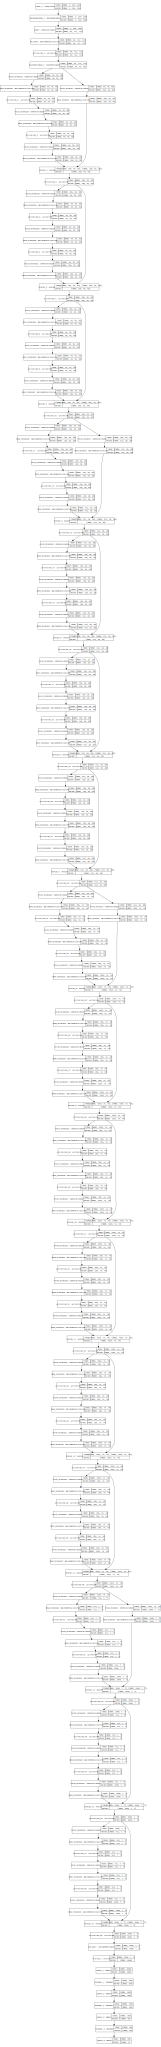

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

graph = model_to_dot(resnet, True, True)
SVG(graph.create(prog='dot', format='svg'))

In [9]:
# from training_utils import exp_decay

# lr_1 = 1.0; a_1 = 0.95
# lr_2 = 1e-1; a_2 = 0.985

# epochs = np.arange(0, 50)
# lrs_1 = exp_decay(epochs, lr=lr_1, a=a_1)
# lrs_2 = exp_decay(epochs, lr=lr_2, a=a_2)
# plt_st(12, 5)
# plt.plot(epochs, lrs_1, label="lr=%f, a=%f" % (lr_1, a_1))
# plt.plot(epochs, lrs_2, label="lr=%f, a=%f" % (lr_2, a_2))
# plt.legend()

In [11]:
seed = 2017
np.random.seed(seed)
save_prefix='resnet_4_dense_cervix_adadelta_seed=%i' % seed

In [12]:
from glob import glob

weights_files = glob("weights/%s*.h5" % save_prefix)
best_val_loss = 1e5
best_weights_filename = ""
for f in weights_files:
    index = os.path.basename(f).index('-')
    loss = float(os.path.basename(f)[index+1:-4])
    if best_val_loss > loss:
        best_val_loss = loss
        best_weights_filename = f
print("Best val loss weights: ", best_weights_filename)


if len(best_weights_filename) > 0:
    # load weights to the model
    print("Load found weights: ", best_weights_filename)
    resnet.load_weights(best_weights_filename)

('Best val loss weights: ', '')


In [14]:
from xy_providers import DataCache
cache = DataCache(2000)

In [ ]:
if True:
    from training_utils import classification_train as train
      
    nb_epochs = 50
    batch_size = 4
    
#     lrate_decay_f = lambda epoch: exp_decay(epoch, lr=lr_1, a=a_1) 

    print("\n {} - Start training ...".format(datetime.now()))
    h = train(resnet, 
              cervix_train_id_type_list, 
              cervix_val_id_type_list, 
              nb_epochs=nb_epochs,
              lrate_decay_f=None, #lrate_decay_f,
              batch_size=batch_size, 
              xy_provider_cache=cache,
              seed=seed,
              save_prefix=save_prefix)    


 2017-04-08 01:53:40.703906 - Start training ...
('-- Training parameters: ', 4, 50, 2048, 1024)
-- Fit stats of train dataset
1635/1635 [==============================] - 27s    
-- Fit model
Epoch 1/50
1300/2048 [==================>...........] - ETA: 50s - loss: 1.2790 - acc: 0.3415

In [ ]:
from training_utils import classification_validate as validate
from test_utils import classification_predict as predict

batch_size = 4

In [ ]:
print("\n {} - Start validation ...".format(datetime.now()))
validate(resnet, cervix_val_id_type_list, batch_size=batch_size, xy_provider_cache=cache)

In [44]:
print("\n {} - Start predictions and write submission ...".format(datetime.now()))
from test_utils import get_test_id_type_list
test_id_type_list = get_test_id_type_list()
cervix_test_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in test_id_type_list]
predict(resnet, cervix_test_id_type_list, info=save_prefix, batch_size=batch_size)


 2017-03-20 13:46:08.072525 - Start predictions and write submission ...
('--', 0)
('--', 8)
('--', 16)
('--', 24)
('--', 32)
('--', 40)
('--', 48)
('--', 56)
('--', 64)
('--', 72)
('--', 80)
('--', 88)
('--', 96)
('--', 104)
('--', 112)
('--', 120)
('--', 128)
('--', 136)
('--', 144)
('--', 152)
('--', 160)
('--', 168)
('--', 176)
('--', 184)
('--', 192)
('--', 200)
('--', 208)
('--', 216)
('--', 224)
('--', 232)
('--', 240)
('--', 248)
('--', 256)
('--', 264)
('--', 272)
('--', 280)
('--', 288)
('--', 296)
('--', 304)
('--', 312)
('--', 320)
('--', 328)
('--', 336)
('--', 344)
('--', 352)
('--', 360)
('--', 368)
('--', 376)
('--', 384)
('--', 392)
('--', 400)
('--', 408)
('--', 416)
('--', 424)
('--', 432)
('--', 440)
('--', 448)
('--', 456)
('--', 464)
('--', 472)
('--', 480)
('--', 488)
('--', 496)
('--', 504)
     513
